<a href="https://colab.research.google.com/github/drishtigupta05/Solar-Panel-Detection-using-Aerial-Imagery/blob/main/solar_panel_detection_using_aerial_imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Sep  6 09:44:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 922, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.12/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ['benchmark', 'track', 'train', 'val', 'export', 'predict'].

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['classify', 'detect', 'obb', 'segment', 'pose']
                MODE (required) is one of ['benchmark', 'track', 'train', 'val', 'export', 'predict']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
      

In [ ]:
# Step 1: Install Roboflow and the compatible image libraries
!pip install roboflow pillow pillow-heif==0.6.0 --quiet

# Step 2: Restart the runtime after installing
# In Colab, click: Runtime > Restart runtime (⚠️ Important)

# Step 3: After restart, run your code again:
from roboflow import Roboflow

rf = Roboflow(api_key="kQwcl0wNa9epr4hrH6HA")
project = rf.workspace("nalerks-senior-project").project("senior-project-ver-2")
version = project.version(1)
dataset = version.download("yolov8-obb")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 95.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Senior-Project-Ver-2-1 in yolov8-obb:: 100%|██████████| 840/840 [00:00<00:00, 7592.89it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m-obb.pt data=/content/Senior-Project-Ver-2-1/data.yaml epochs=100 imgsz=640


WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Senior-Project-Ver-2-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tr

In [ ]:
!yolo detect predict model=/content/runs/obb/train/weights/best.pt source=/content/Senior-Project-Ver-2-1/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-obb summary (fused): 101 layers, 26,401,804 parameters, 0 gradients, 80.8 GFLOPs

image 1/20 /content/Senior-Project-Ver-2-1/test/images/PV01_325122_1203763_bmp_jpg.rf.e1cad93f9e32ec0550d09acab90dce62.jpg: 640x640 1 Solar-panels, 38.4ms
image 2/20 /content/Senior-Project-Ver-2-1/test/images/PV01_325122_1203837_bmp_jpg.rf.564887ad47582ea49894dd1e8959b41c.jpg: 640x640 4 Solar-panelss, 38.4ms
image 3/20 /content/Senior-Project-Ver-2-1/test/images/PV01_325131_1203826_bmp_jpg.rf.d9d7975e8cfd1d3a6bf92e8fc35d5a8f.jpg: 640x640 1 Solar-panels, 38.4ms
image 4/20 /content/Senior-Project-Ver-2-1/test/images/PV01_325357_1203794_bmp_jpg.rf.88cb2d7c282d31d8caeb124a5327a2da.jpg: 640x640 1 Solar-panels, 36.5ms
image 5/20 /content/Senior-Project-Ver-2-1/test/images/PV01_325496_120375

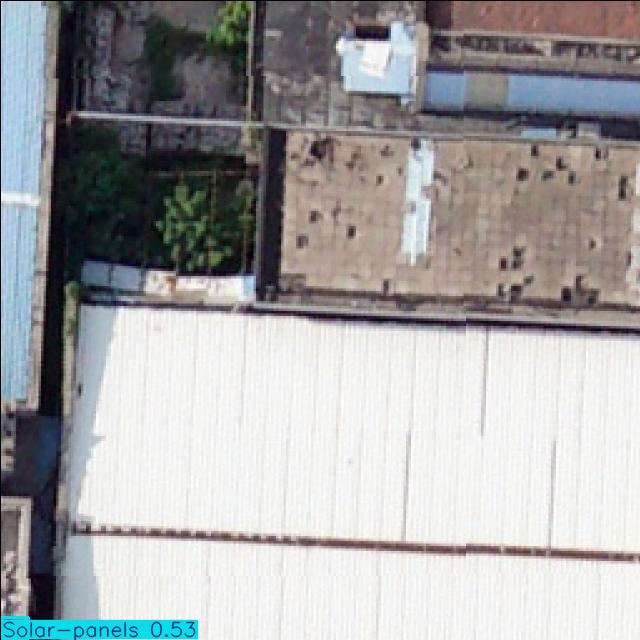

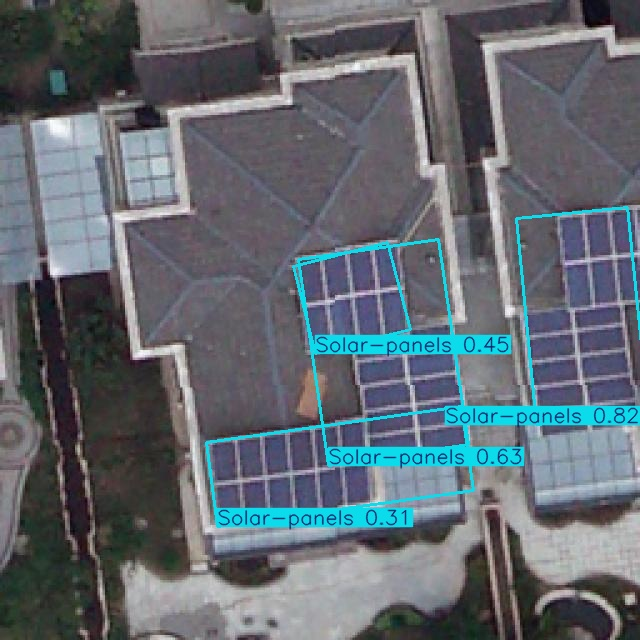

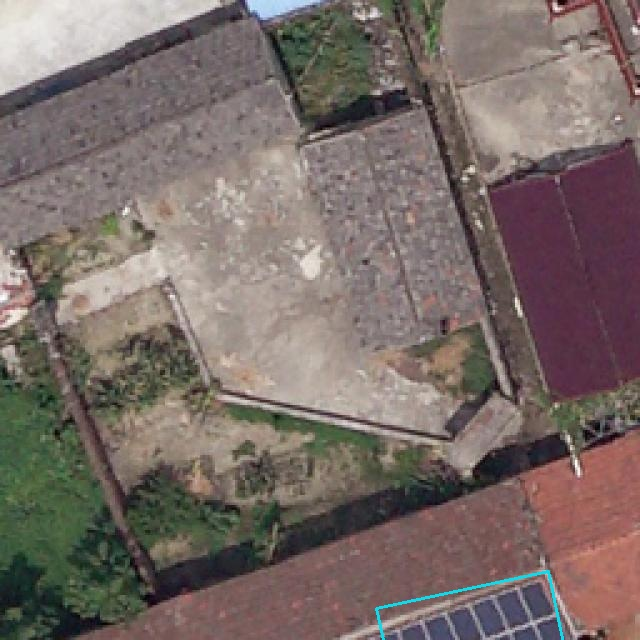

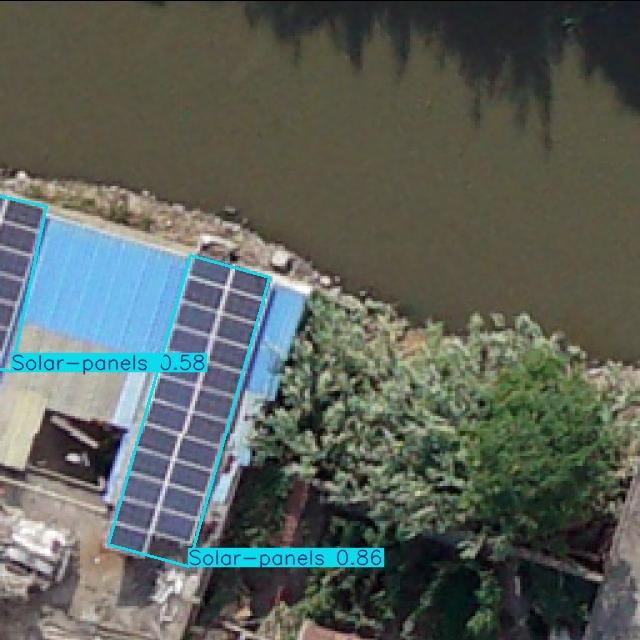

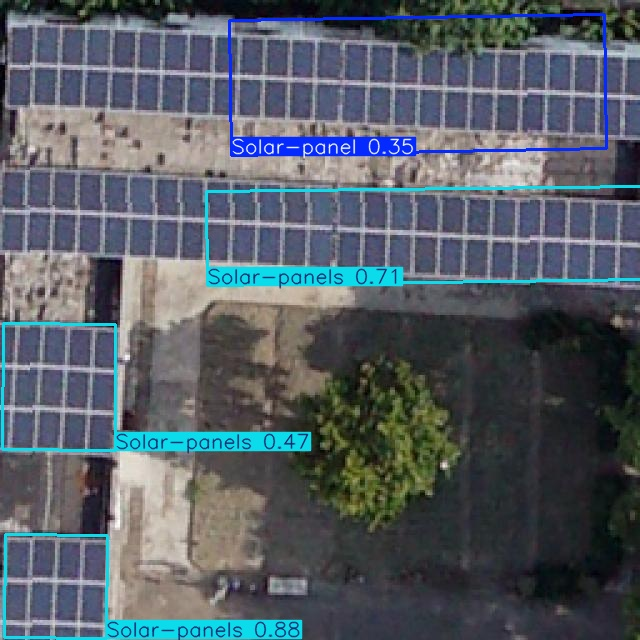

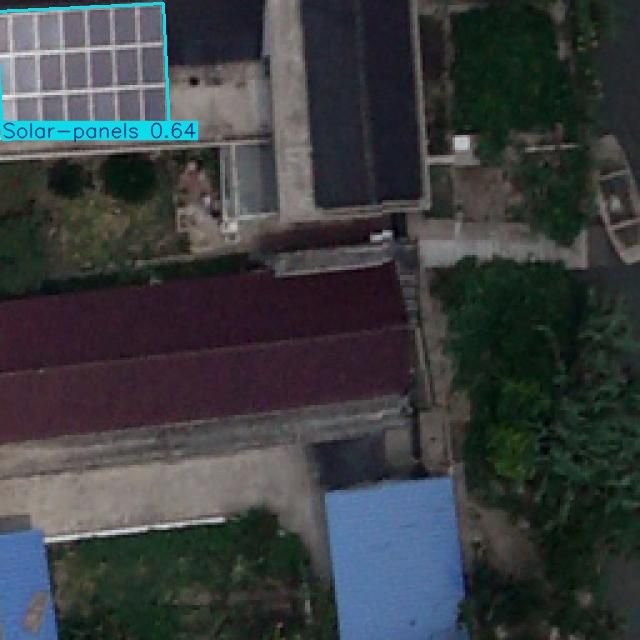

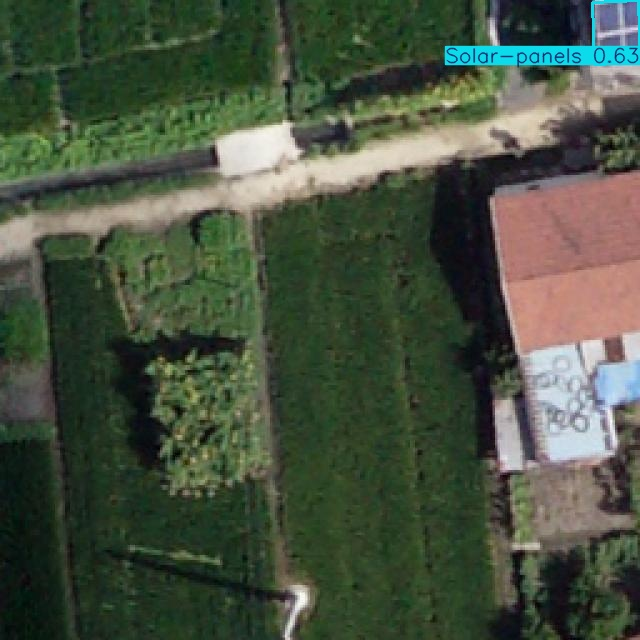

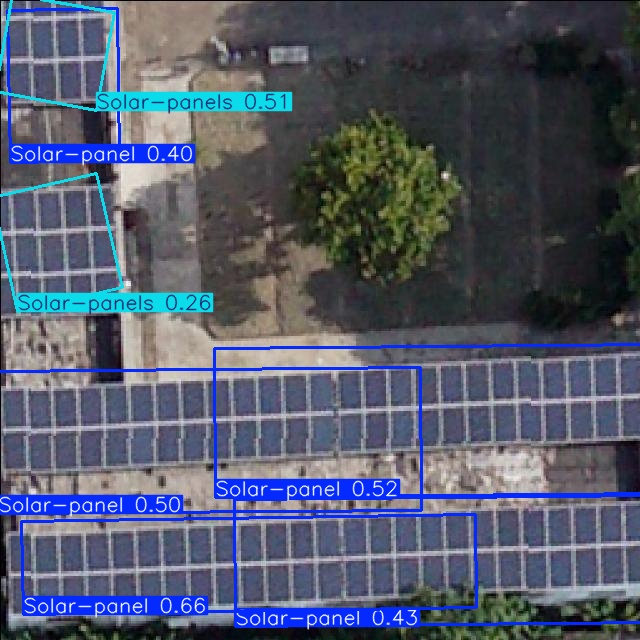

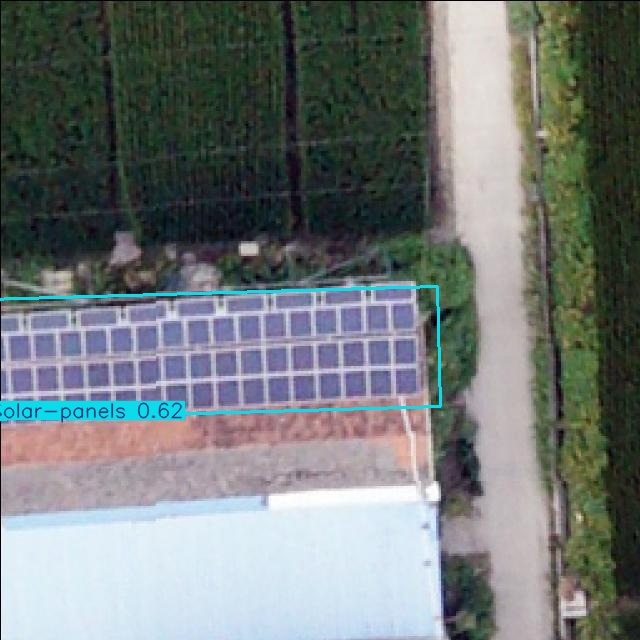

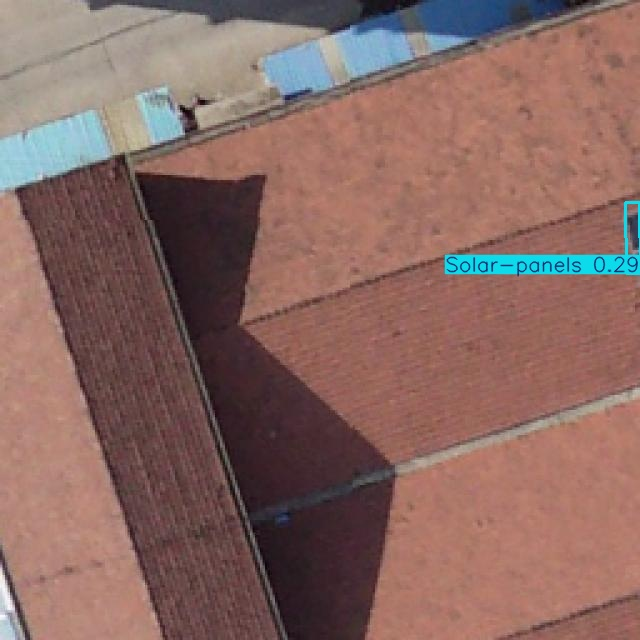

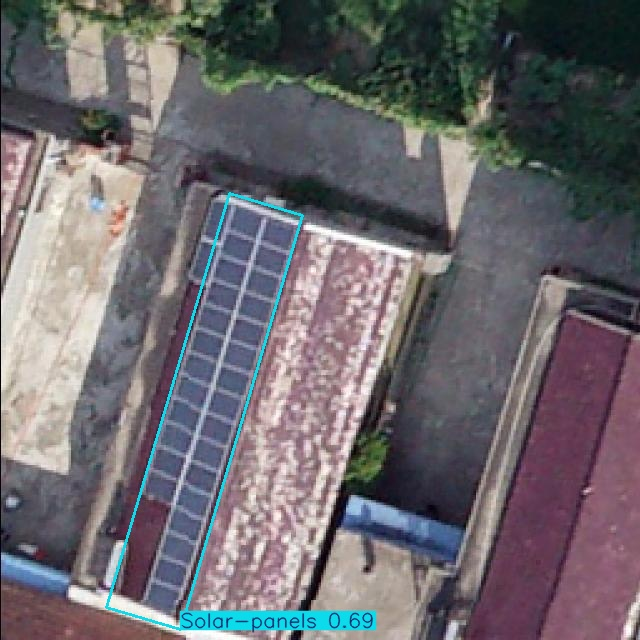

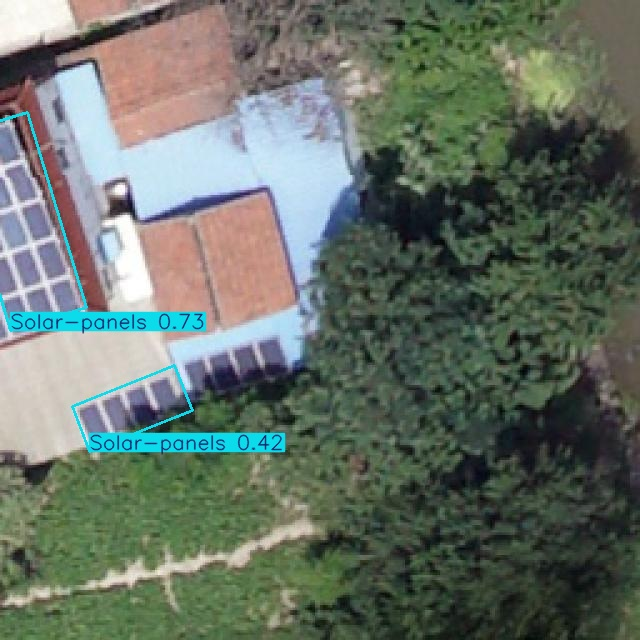

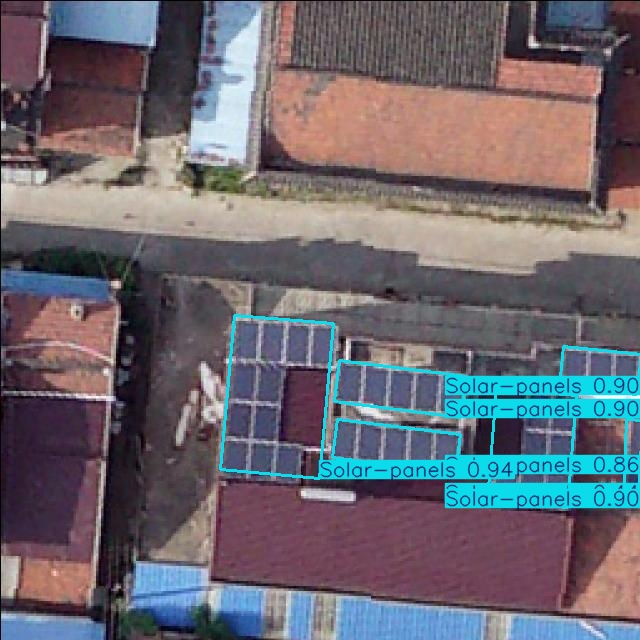

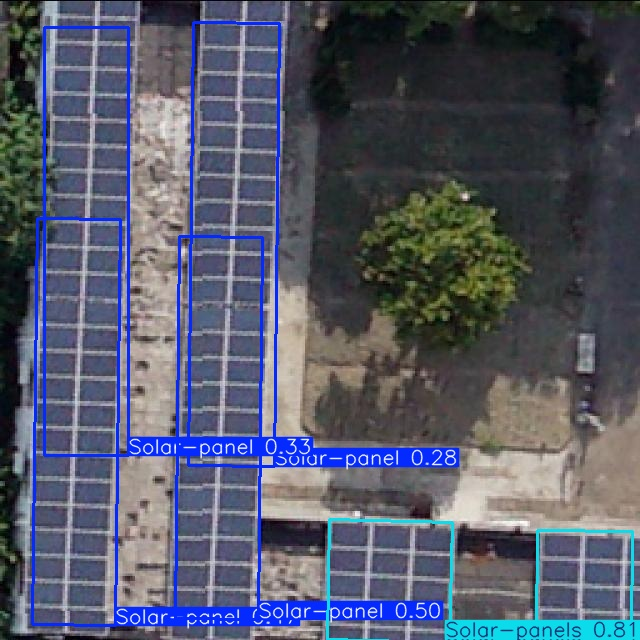

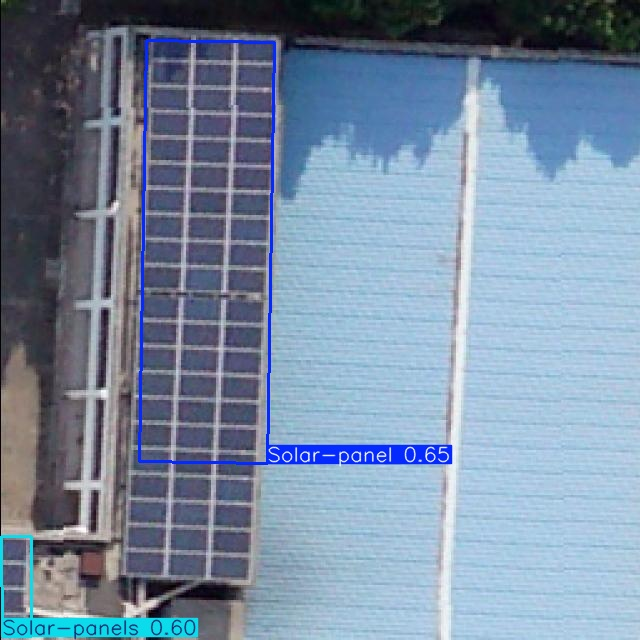

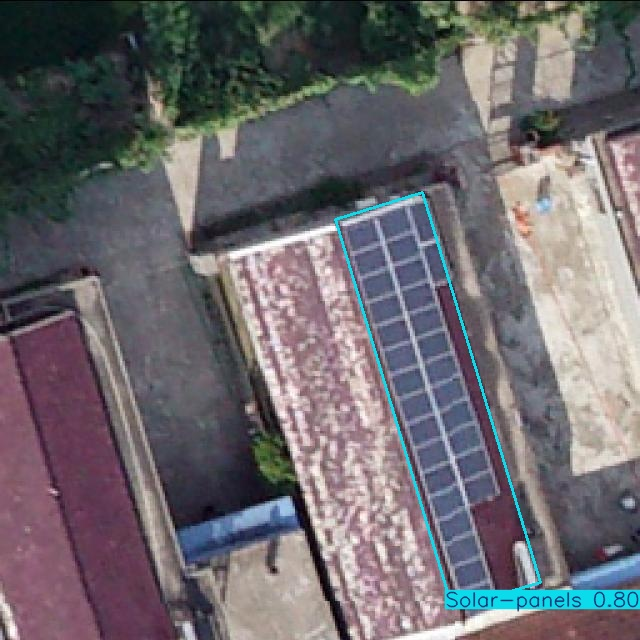

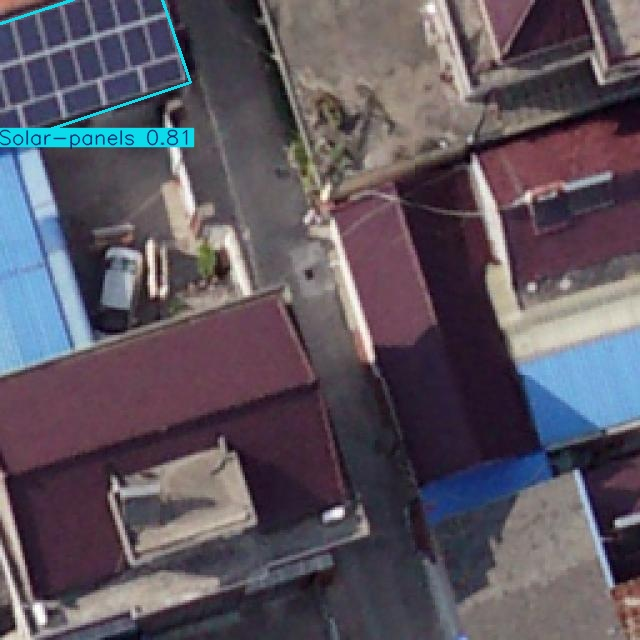

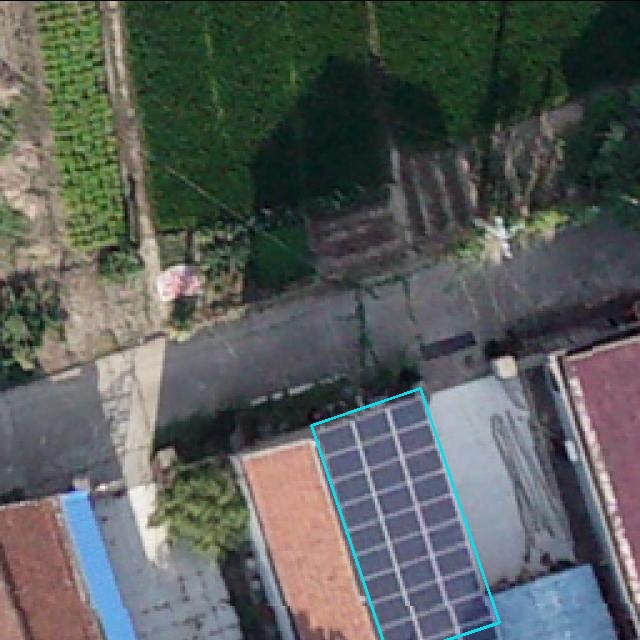

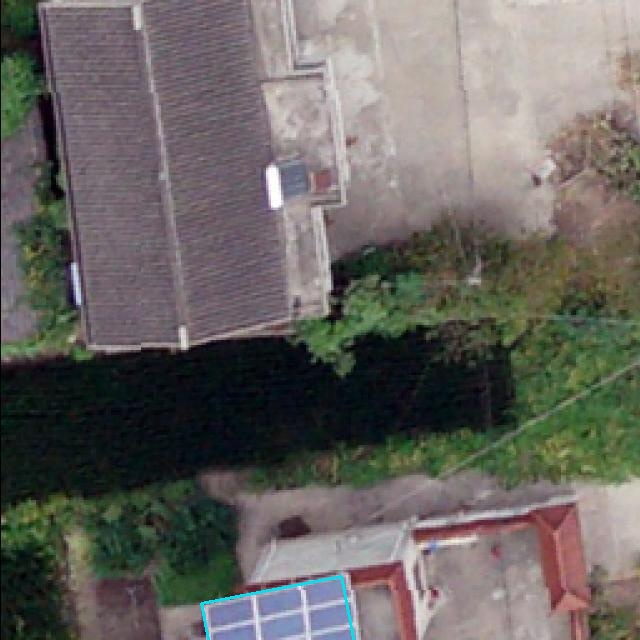

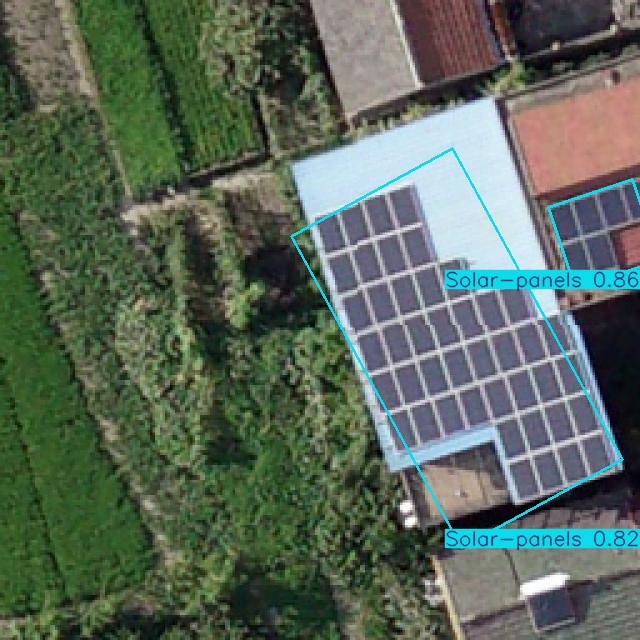

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/obb/predict/*.jpg'):
  display(Image(filename=image_path,height=400, width=600))
  print("\n")

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
model = YOLO('/content/runs/obb/train/weights/best.pt')

In [ ]:
results = model('/content/Aerial Of Solar Panel.mp4', save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/817) /content/Aerial Of Solar Panel.mp4: 384x640 (no detections), 69.1ms
video 1/1 (frame 2/817) /content/Aerial Of Solar Panel.mp4: 384x640 (no detections), 26.2ms
video 1/1 (frame 3/817) /content/Aerial Of Solar Panel.mp4: 384x640 (no detections), 26.2ms
video 1/1 (frame 4/817) /content/Aerial Of Solar Panel.mp4: 384x640 (no detections), 26.2ms
video 1/1 (frame 5/817) /content/Aerial Of Solar Panel.mp4: 384x640 (no detections), 26.